### MRPC with Roberta Experiments

**Objective:** Replicate results from the original paper.

Due to resource constraints, I adjusted the batch size to 12 (compared to 32 in the paper). All other parameters were kept consistent with those in the original implementation.

In [1]:
import os
import json

base_dir = "results/mrpc"
trainer_states = {}

for subdir in os.listdir(base_dir):
    subdir_path = os.path.join(base_dir, subdir)
    if subdir not in trainer_states:
        trainer_states[subdir]={}
    
    if os.path.isdir(subdir_path):
        roberta_path = os.path.join(subdir_path, "roberta-large", "mrpc")
        if os.path.isdir(roberta_path):
            for folder_name in os.listdir(roberta_path):
                
                model_path = os.path.join(roberta_path, folder_name)
                for num,folder_name in enumerate(os.listdir(model_path)):
                  trainer_state_path = os.path.join(model_path, folder_name,"trainer_state.json")

                  if os.path.isfile(trainer_state_path):
                     with open(trainer_state_path, 'r') as file:
                           trainer_state = json.load(file)
                           trainer_states[subdir][num] = trainer_state



In [2]:
trainer_states['results_mrpc_12'][0]['log_history'][15]

{'epoch': 0.6971677559912854,
 'grad_norm': 14.457045555114746,
 'learning_rate': 0.0005916339869281045,
 'loss': 0.4725,
 'step': 320}

In [3]:
trainer_states['results_mrpc_12'][0]['log_history'][22]

{'epoch': 1.0,
 'eval_accuracy': 0.8308823529411765,
 'eval_combined_score': 0.8587909301651695,
 'eval_f1': 0.8866995073891626,
 'eval_loss': 0.49732762575149536,
 'eval_runtime': 11.9023,
 'eval_samples_per_second': 34.279,
 'eval_steps_per_second': 4.285,
 'step': 459}

In [4]:
trainer_states['results_mrpc_12'][0]['log_history'][46]

{'epoch': 2.0,
 'eval_accuracy': 0.8602941176470589,
 'eval_combined_score': 0.8793449197860963,
 'eval_f1': 0.8983957219251337,
 'eval_loss': 0.3416175842285156,
 'eval_runtime': 11.9095,
 'eval_samples_per_second': 34.258,
 'eval_steps_per_second': 4.282,
 'step': 918}

In [5]:
trainer_states['results_mrpc_12'][0]['log_history'][70]

{'epoch': 3.0,
 'eval_accuracy': 0.8627450980392157,
 'eval_combined_score': 0.8799019607843137,
 'eval_f1': 0.8970588235294118,
 'eval_loss': 0.36844971776008606,
 'eval_runtime': 11.8939,
 'eval_samples_per_second': 34.303,
 'eval_steps_per_second': 4.288,
 'step': 1377}

In [6]:
trainer_states['results_mrpc_12'][0]['log_history'][45]

{'epoch': 1.9607843137254903,
 'grad_norm': 6.000397205352783,
 'learning_rate': 0.0005764705882352941,
 'loss': 0.3903,
 'step': 900}

In [7]:
log_history=trainer_states['results_mrpc_12'][0]['log_history']

In [8]:
import matplotlib.pyplot as plt

LoRa-XS with rank 4 and version 0


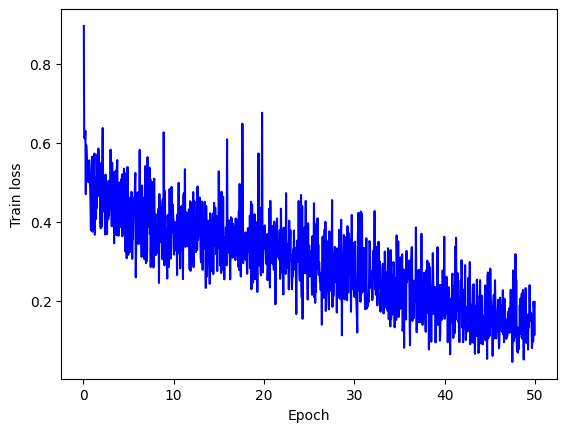

Max accuracy achieved: 0.8823529411764706
Accuracy achieved at the last epoch: 0.8602941176470589


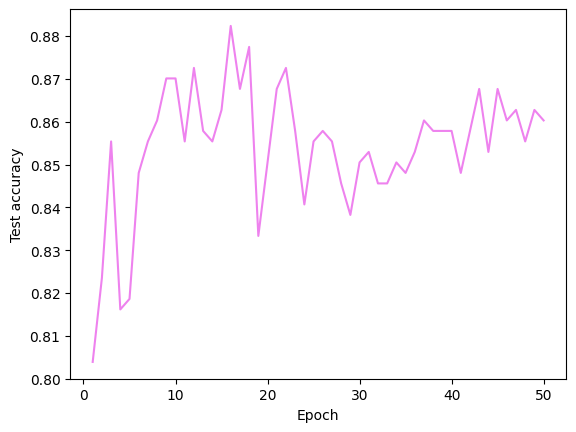

--------------------------------------------------------------------------
LoRa-XS with rank 8 and version 0


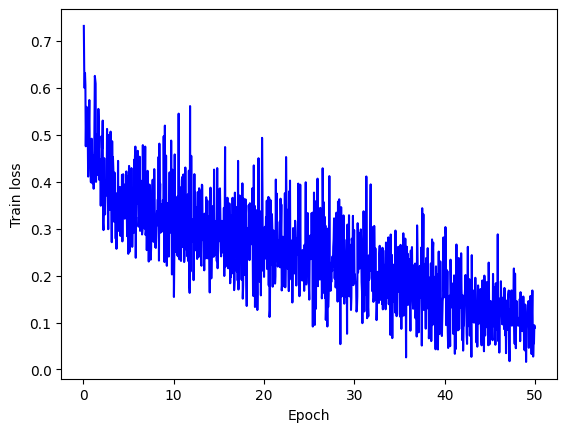

Max accuracy achieved: 0.8921568627450981
Accuracy achieved at the last epoch: 0.8529411764705882


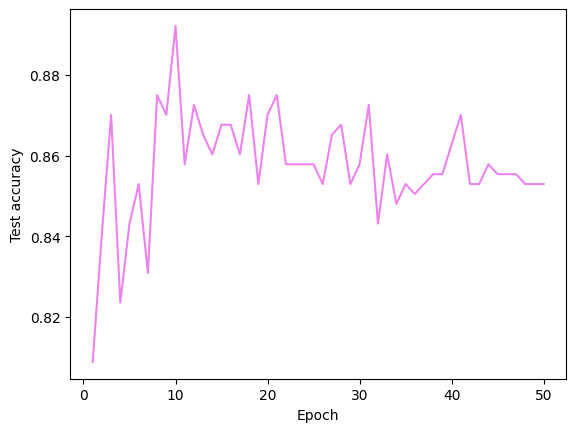

--------------------------------------------------------------------------
LoRa-XS with rank 12 and version 0


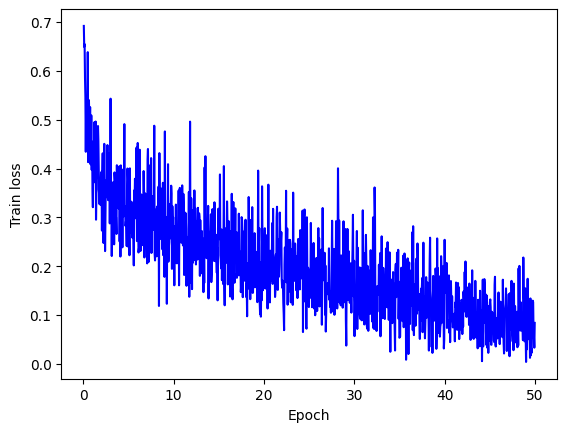

Max accuracy achieved: 0.8921568627450981
Accuracy achieved at the last epoch: 0.8774509803921569


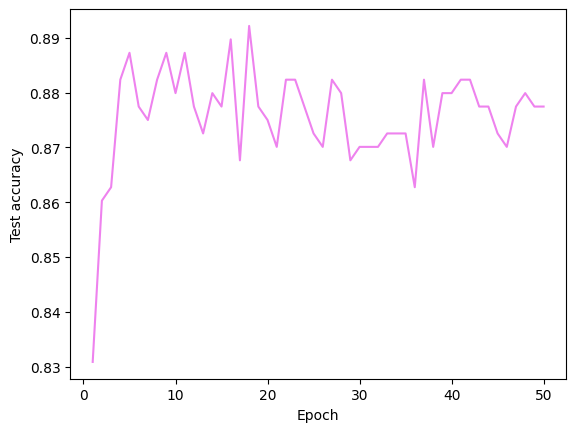

--------------------------------------------------------------------------
LoRa-XS with rank 16 and version 0


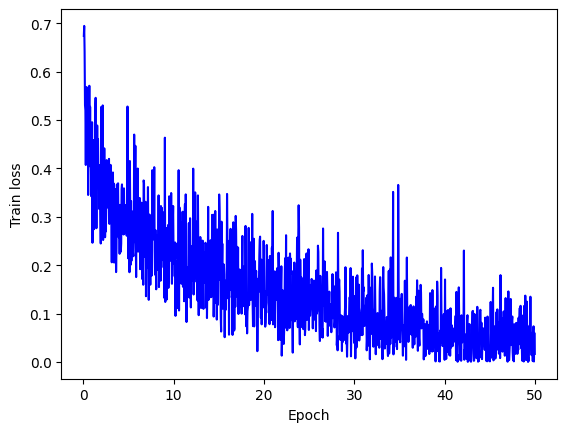

Max accuracy achieved: 0.9019607843137255
Accuracy achieved at the last epoch: 0.8921568627450981


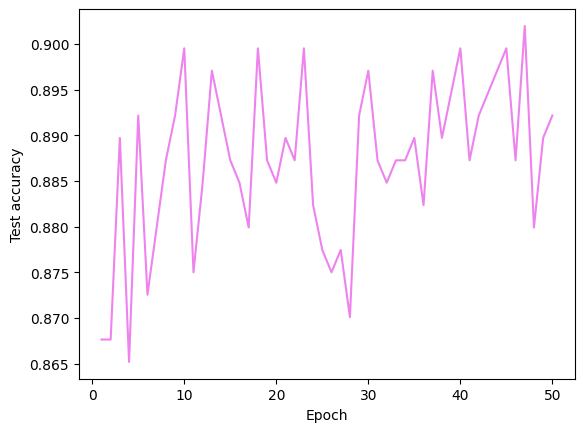

--------------------------------------------------------------------------
LoRa-XS with rank 16 and version 1


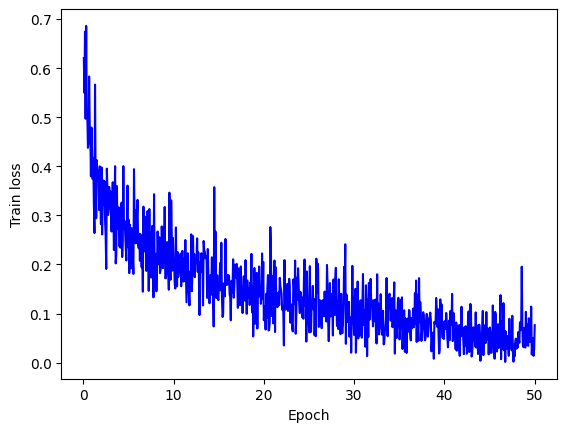

Max accuracy achieved: 0.8995098039215687
Accuracy achieved at the last epoch: 0.8946078431372549


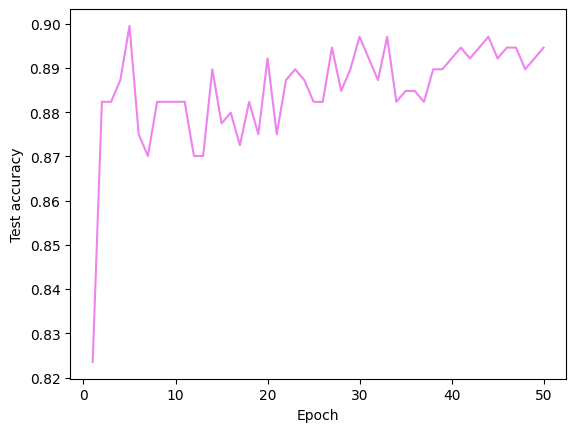

--------------------------------------------------------------------------
LoRa-XS with rank 20 and version 1


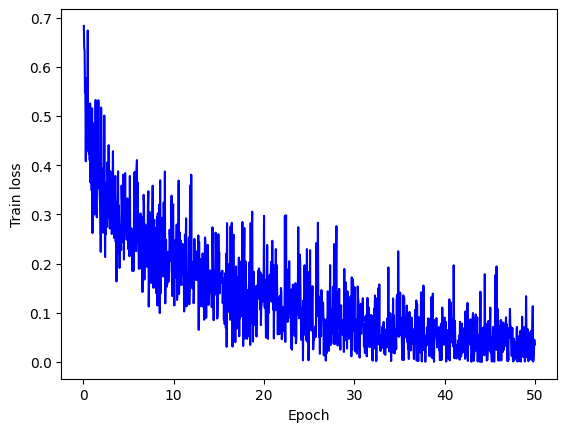

Max accuracy achieved: 0.8995098039215687
Accuracy achieved at the last epoch: 0.8799019607843137


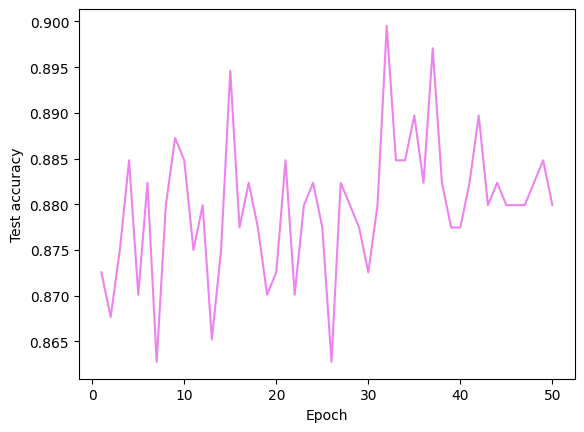

--------------------------------------------------------------------------
LoRa-XS with rank 20 and version 3


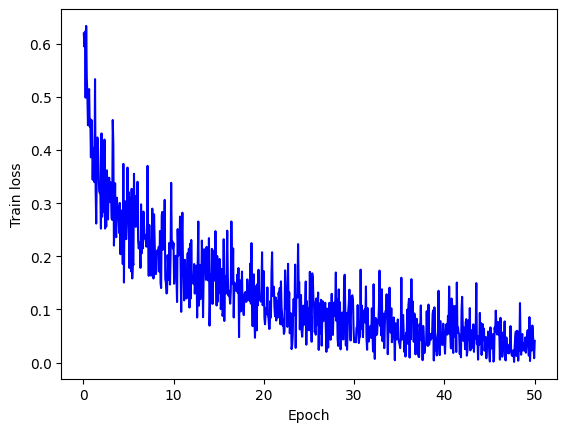

Max accuracy achieved: 0.9044117647058824
Accuracy achieved at the last epoch: 0.8823529411764706


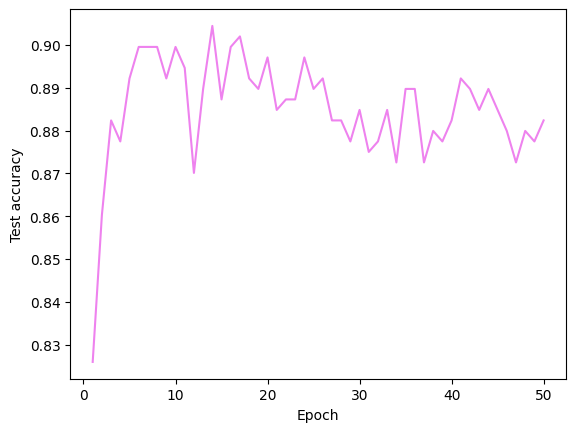

--------------------------------------------------------------------------
LoRa-XS with rank 25 and version 0


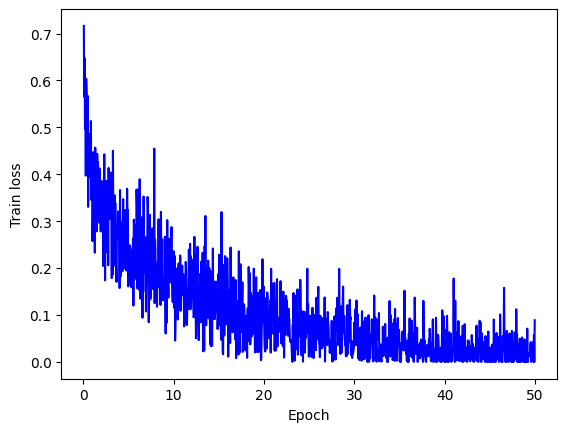

Max accuracy achieved: 0.8995098039215687
Accuracy achieved at the last epoch: 0.8823529411764706


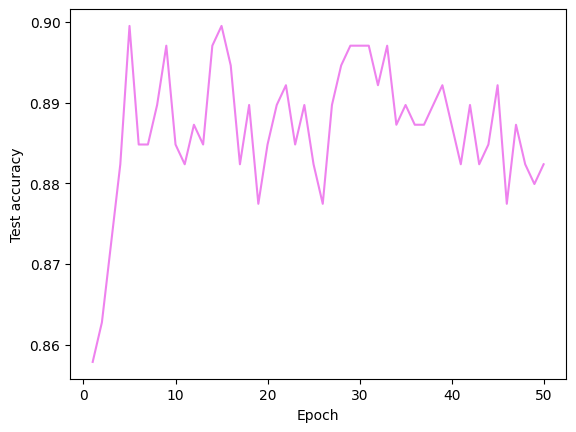

--------------------------------------------------------------------------
LoRa-XS with rank 25 and version 1


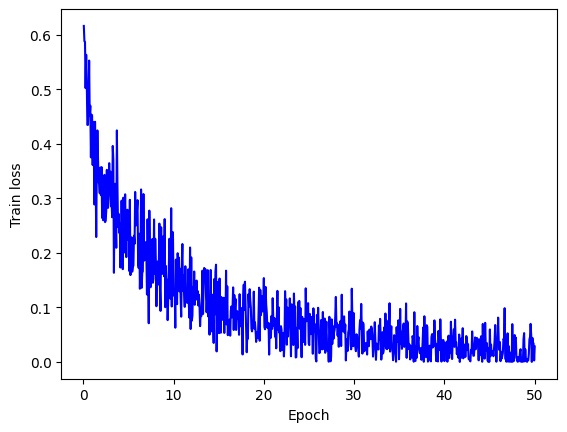

Max accuracy achieved: 0.9142156862745098
Accuracy achieved at the last epoch: 0.9019607843137255


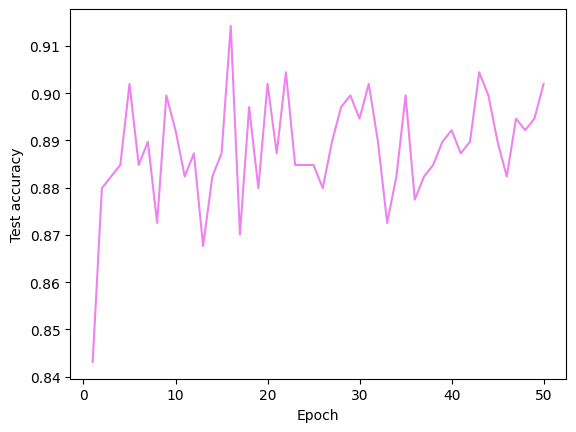

--------------------------------------------------------------------------
LoRa-XS with rank 25 and version 2


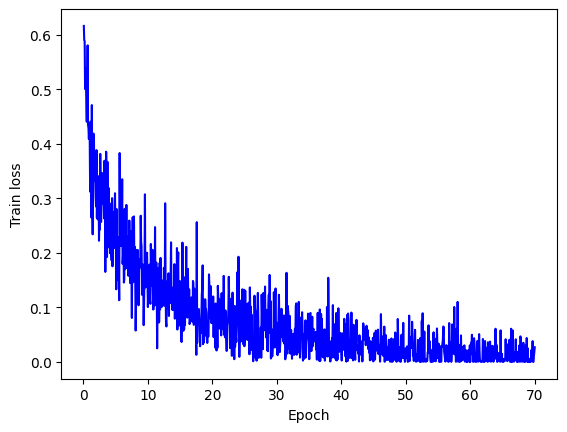

Max accuracy achieved: 0.9068627450980392
Accuracy achieved at the last epoch: 0.8970588235294118


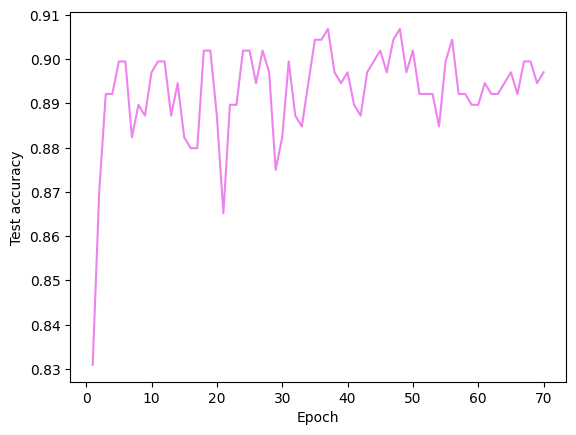

--------------------------------------------------------------------------


In [18]:
mrpc_results={}
for result_title in sorted(trainer_states.keys(),key=lambda x: int(x[13:])):
   rank=int(result_title[13:])
   result_dict=trainer_states[result_title]
   for key, val in result_dict.items():
      print(f'LoRa-XS with rank {rank} and version {key}')
      log_history=val['log_history']
      log_history_eval=[log_history[i] for i in range(len(log_history)) if 'eval_accuracy' in log_history[i].keys()]
      log_history_eval_epochs=[log_history_eval[i]['epoch'] for i in range(len(log_history_eval))]
      log_history_eval_accuracies=[log_history_eval[i]['eval_accuracy'] for i in range(len(log_history_eval))]
      log_history_eval_losses=[log_history_eval[i]['eval_loss'] for i in range(len(log_history_eval))]
      log_history_train=[log_history[i] for i in range(len(log_history)) if 'eval_accuracy' not in log_history[i].keys()]
      log_history_train_epochs=[log_history_train[i]['epoch'] for i in range(len(log_history_train)-1)]
      log_history_train_losses=[log_history_train[i]['loss'] for i in range(len(log_history_train)-1)]

      plt.figure()
      plt.plot(log_history_train_epochs, log_history_train_losses, color='b')
      plt.xlabel('Epoch')
      plt.ylabel('Train loss')
      plt.show()
      max_accuracy=max(log_history_eval_accuracies)
      print(f'Max accuracy achieved: {max_accuracy}')
      mrpc_results[rank]=max(mrpc_results.get(rank, -1), max_accuracy)
      print(f'Accuracy achieved at the last epoch: {(log_history_eval_accuracies[-1])}')
      plt.figure()
      plt.plot(log_history_eval_epochs, log_history_eval_accuracies, color='violet')
      plt.xlabel('Epoch')
      plt.ylabel('Test accuracy')
      plt.show()
      print("--------------------------------------------------------------------------")








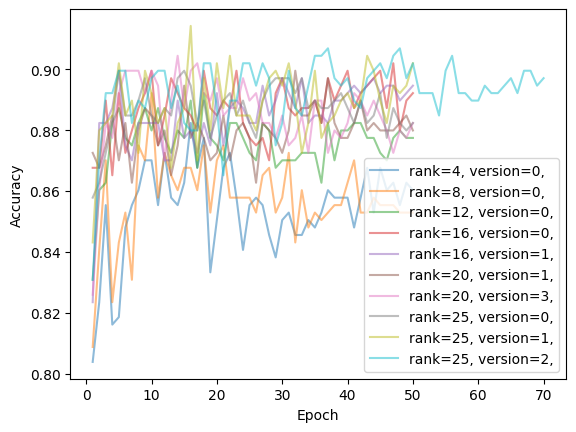

In [37]:
for result_title in sorted(trainer_states.keys(),key=lambda x: int(x[13:])):
   rank=int(result_title[13:])
   result_dict=trainer_states[result_title]
   for key, val in result_dict.items():
      log_history=val['log_history']
      log_history_eval=[log_history[i] for i in range(len(log_history)) if 'eval_accuracy' in log_history[i].keys()]
      log_history_eval_epochs=[log_history_eval[i]['epoch'] for i in range(len(log_history_eval))]
      log_history_eval_accuracies=[log_history_eval[i]['eval_accuracy'] for i in range(len(log_history_eval))]

      plt.plot(log_history_eval_epochs, log_history_eval_accuracies, label=f'{rank=}, version={key},', alpha=0.5)
      plt.xlabel('Epoch')
      plt.ylabel('Accuracy')
plt.legend()
plt.show()









In [42]:
loraxs_paper_results = {
    25: "91.18 ± 0.82",
    20: "90.44 ± 0.41",
    16: "90.69 ± 0.37",
    12: "90.20 ± 0.32",
    8: "88.48 ± 0.64",
    4: "87.75 ± 0.33"
}


In [46]:
print("Best accuracies achieved:")
for key in sorted(mrpc_results.keys()):
    print(f"Rank: {key}, Replicated result {mrpc_results[key]*100}, Original results: {loraxs_paper_results[key]}  ")

Best accuracies achieved:
Rank: 4, Replicated result 88.23529411764706, Original results: 87.75 ± 0.33  
Rank: 8, Replicated result 89.2156862745098, Original results: 88.48 ± 0.64  
Rank: 12, Replicated result 89.2156862745098, Original results: 90.20 ± 0.32  
Rank: 16, Replicated result 90.19607843137256, Original results: 90.69 ± 0.37  
Rank: 20, Replicated result 90.44117647058823, Original results: 90.44 ± 0.41  
Rank: 25, Replicated result 91.42156862745098, Original results: 91.18 ± 0.82  


- **Rank 4**: Replicated result (88.24) is close but slightly higher than the original result (87.75 ± 0.33), within a reasonable tolerance.

- **Rank 8**: Replicated result (89.22) is again higher than the original (88.48 ± 0.64) but still close.

- **Rank 12**: Replicated result (89.22) is slightly below the original (90.20 ± 0.32), indicating a small drop that might be due to minor experimental setup differences (batch_size=12).

- **Rank 16**: Replicated result (90.20) is relatively close to the original (90.69 ± 0.37), with a slight deviation.

- **Rank 20**: Replicated result (90.44) is an almost exact match to the original (90.44 ± 0.41).

- **Rank 25**: Replicated result (91.42) is very close to the original (91.18 ± 0.82)


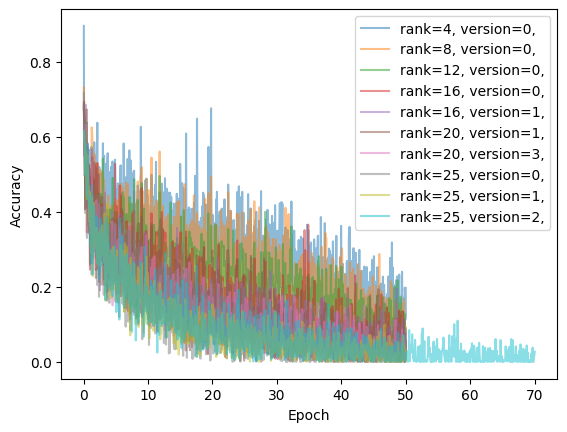

In [38]:
for result_title in sorted(trainer_states.keys(),key=lambda x: int(x[13:])):
   rank=int(result_title[13:])
   result_dict=trainer_states[result_title]
   for key, val in result_dict.items():
      log_history=val['log_history']
      log_history_eval=[log_history[i] for i in range(len(log_history)) if 'eval_accuracy' in log_history[i].keys()]
      log_history_eval_epochs=[log_history_eval[i]['epoch'] for i in range(len(log_history_eval))]
      log_history_eval_accuracies=[log_history_eval[i]['eval_accuracy'] for i in range(len(log_history_eval))]
      log_history_eval_losses=[log_history_eval[i]['eval_loss'] for i in range(len(log_history_eval))]
      log_history_train=[log_history[i] for i in range(len(log_history)) if 'eval_accuracy' not in log_history[i].keys()]
      log_history_train_epochs=[log_history_train[i]['epoch'] for i in range(len(log_history_train)-1)]
      log_history_train_losses=[log_history_train[i]['loss'] for i in range(len(log_history_train)-1)]

      plt.plot(log_history_train_epochs, log_history_train_losses, label=f'{rank=}, version={key},', alpha=0.5)
      plt.xlabel('Epoch')
      plt.ylabel('Accuracy')
plt.legend()
plt.show()







